<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<div dir=ltr align=center> <font color=0F5298 size=7>     Machine Learning <br> <font color=2565AE size=5>     Faculty of Computer Engineering <br>     Fall 2024 <br> <font color=3C99D size=5> First Practical Exercise - Supervised Learning <br> <font color=696880 size=4> Ayeen Poostforoushan

<div dir=ltr>
<font size=6>
Implementation

<div dir=ltr> <font size=4> Using the `make_blobs` function from the `sklearn` library with the code snippet below, create a dataset that is linearly separable. Each column of the matrix **X** contains the features of a data sample.

In [265]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100, n_features=10, centers=2, random_state=41)

<div dir=ltr> <font size=4> First, I create a class named F and implement one of its methods called sign. The methods of this class belong to the class itself, so I define them as static. This class serves as a utility for performing calculations, and in this case, I focus on defining the sign method.

In [266]:
class F:
  @staticmethod
  def sign(x):
    return 1 if x >= 0 else 0

<div dir=ltr> <font size=4> I implement a class called Perceptron, as shown in the code snippet below. This class stores the weights of our perceptron and computes the output y based on the input X. To initialize the weights and bias, I use the numpy library, which provides a convenient way to handle numerical operations.

In [267]:
import numpy as np

class Perceptron:
  def __init__(self, input_size):
    # Initialize the weights and biases of the new model
    self.weights = np.random.rand(input_size)
    self.bias = np.random.rand(1)

  def forward(self, input: np.ndarray):
    # Feed input features to your model and return output
    return F.sign(input.T @ self.weights + self.bias)

<div dir=ltr> <font size=4> Now, I implement the Optimizer class as shown in the code snippet below. This class is responsible for optimizing our model. Specifically, during each learning step, it updates the weights in a direction that aims to minimize errors, ultimately achieving zero error (assuming the data is linearly separable).

In [268]:
class Optimizer:
  def __init__(self, model: Perceptron, learning_rate: float):
    self.model = model
    self.learning_rate = learning_rate
    
  def update(self, x, y, y_hat):
    # Update the weights and biases of the model
    if y_hat != y:
        y_coefficient = 1 if y == 1 else -1
        self.model.weights += self.learning_rate * y_coefficient * x
        self.model.bias += self.learning_rate * y_coefficient

<div dir=ltr> <font size=4> Based on the number of features in the dataset, I create a Perceptron object (this parameter must match the number of features from the first part). Next, I allow the Optimizer to access the model so it can optimize it.

<div dir=ltr> <font size=4> In this part, I implement a suitable process using instances of the Optimizer and Perceptron classes to improve the model's performance. This process helps the model move closer to the separating hyperplane.

In [269]:
n_iter = 1000
model = Perceptron(input_size=10)
optimizer = Optimizer(model, learning_rate=0.01)

for _ in range(n_iter):
    epoch_error_count = 0
    for x, y in zip(X, Y):
        y_hat = model.forward(x)
        
        if y_hat != y:
            epoch_error_count += 1
            
        optimizer.update(x, y, y_hat)

    if epoch_error_count == 0:
        break

<div dir=ltr> <font size=4> For n_features equal to 2, I visualize the dataset points and the resulting line from the Perceptron in a 2D space using the Matplotlib library.

In [270]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=41)

model_v2 = Perceptron(input_size=2)
optimizer_v2 = Optimizer(model_v2, learning_rate=0.01)

for _ in range(n_iter):
    epoch_error_count = 0
    for x, y in zip(X, Y):
        y_hat = model_v2.forward(x)
        
        if y_hat != y:
            epoch_error_count += 1
        
        optimizer_v2.update(x, y, y_hat)
        
    if epoch_error_count == 0:
        print('Converged in', _+1, 'iterations')
        break

Converged in 1 iterations


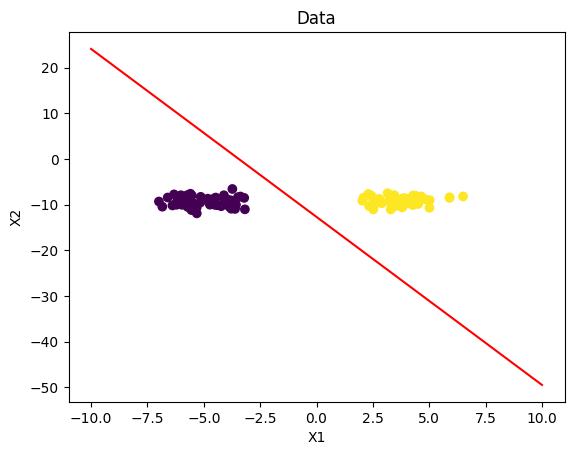

In [271]:
import matplotlib.pyplot as plt
#plot the line too

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data')

x1 = np.linspace(-10, 10, 10)
x2 = -model_v2.weights[0] / model_v2.weights[1] * x1 - model_v2.bias / model_v2.weights[1]
plt.plot(x1, x2, color='red')

plt.show()